## Diamond Price Prediction  ~ rigression 
### Renana Rimon

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.dummy import DummyRegressor

# Project Target:
predict the diamond price, given the following parameters:

This dataset contains the prices and other 9 attributes of almost 54,000 diamonds.

## featers:
1. **carat:** The carat is the diamond’s physical weight measured in metric carats. <br> One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 
   * continiuous: 0.2 - 5.01


2. **cat:** The more precise the diamond is cut, the better the diamond is considered. 
   * categorialy: Fair, Good, Very Good, Premium, Ideal.


3. **color:** The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest.
   * categorialy:  from J (worst) to D (best).
 
 
4. **clarity:** xternal or internal blemishes of the diamond. 
   * I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
   
**Dimensions** (in mm)

**x** = length (0 - 10.74)

**y** = width (0 - 58.9)

**z** = depth (0 - 31.8)

![title](Cut-Anatomy-of-Diamond.png)
from IPython.display import Image
Image("Cut-Anatomy-of-Diamond.png")

5. **depth:**<br> total depth percentage = $ \frac{z}{mean(x, y)} = \frac{2z }{(x + y)} $ (43 - 79) <br>The depth of the diamond is its height (in mm) measured from the culet (bottom tip) to the table (top surface).

6. **table:** width of the top of the diamond relative to widest point (43 - 95).

7. **price:** target feature - predict the price given the other factors.

In [5]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.shape

(53940, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
# 0 null
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [10]:
# drop the index column
df = df.drop(["Unnamed: 0"], axis=1)
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Observations

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents a dimensionless or 2D diamonds.<br> So we need to filter out those as it clearly faulty data points.

In [11]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


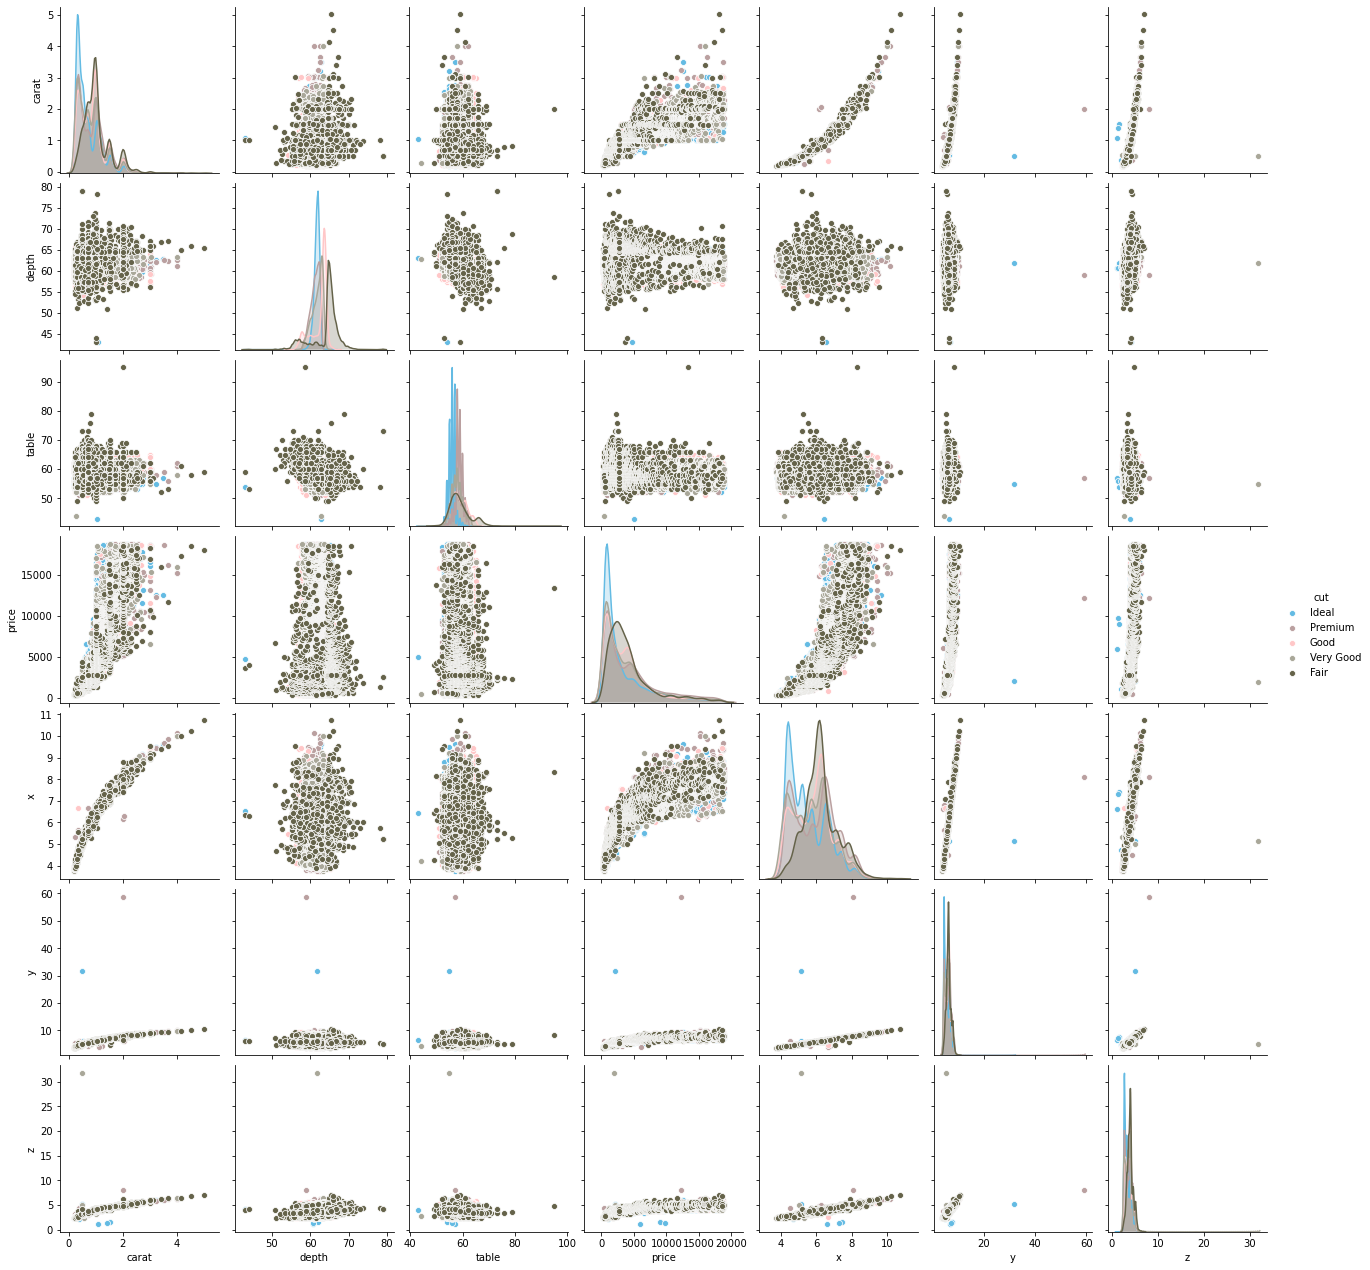

In [13]:
#color the points by 'cut' feature. 
shade = ["#64bbe3", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]
ax = sns.pairplot(df, hue= "cut",palette=shade)

### outliers - find & remove from df ###

from the pairplot it can be seen in which feature there can be a state of *outliers*, <br>
and these cases will be examined.
(only features with outliers found are displayed)

Text(0.5, 1.0, "Regression Line - price & 'y'")

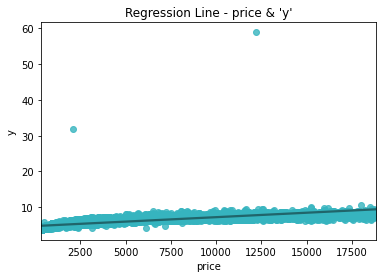

In [14]:
ax = sns.regplot(x="price", y="y", data=df, fit_reg=True, scatter_kws={"color": "#36b4bf"}, line_kws={"color": "#20656b"})
ax.set_title("Regression Line - price & 'y'")


Text(0.5, 1.0, "Regression Line - price & 'z'")

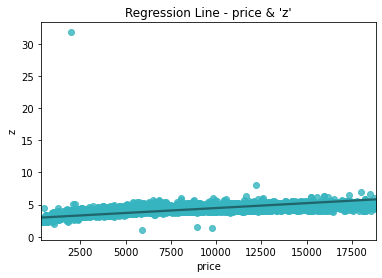

In [15]:
ax = sns.regplot(x="price", y="z", data=df, fit_reg=True, scatter_kws={"color": "#36b4bf"}, line_kws={"color": "#20656b"})
ax.set_title("Regression Line - price & 'z'")

Text(0.5, 1.0, 'Regression Line - price & depth')

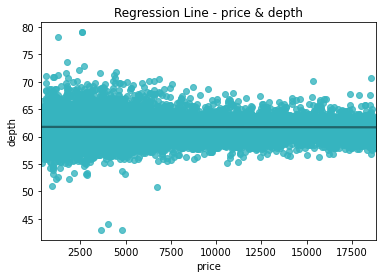

In [16]:
ax = sns.regplot(x="price", y="depth", data=df, fit_reg=True, scatter_kws={"color": "#36b4bf"}, line_kws={"color": "#20656b"})
ax.set_title("Regression Line - price & depth")

Text(0.5, 1.0, 'Regression Line - price & table')

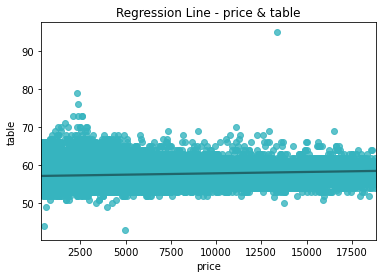

In [17]:
ax = sns.regplot(x="price", y="table", data=df, fit_reg=True, scatter_kws={"color": "#36b4bf"}, line_kws={"color": "#20656b"})
ax.set_title("Regression Line - price & table")

In [18]:
#Dropping the outliers
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df.shape

(53907, 10)

### after cleaning data set from outliers, let's have a second look

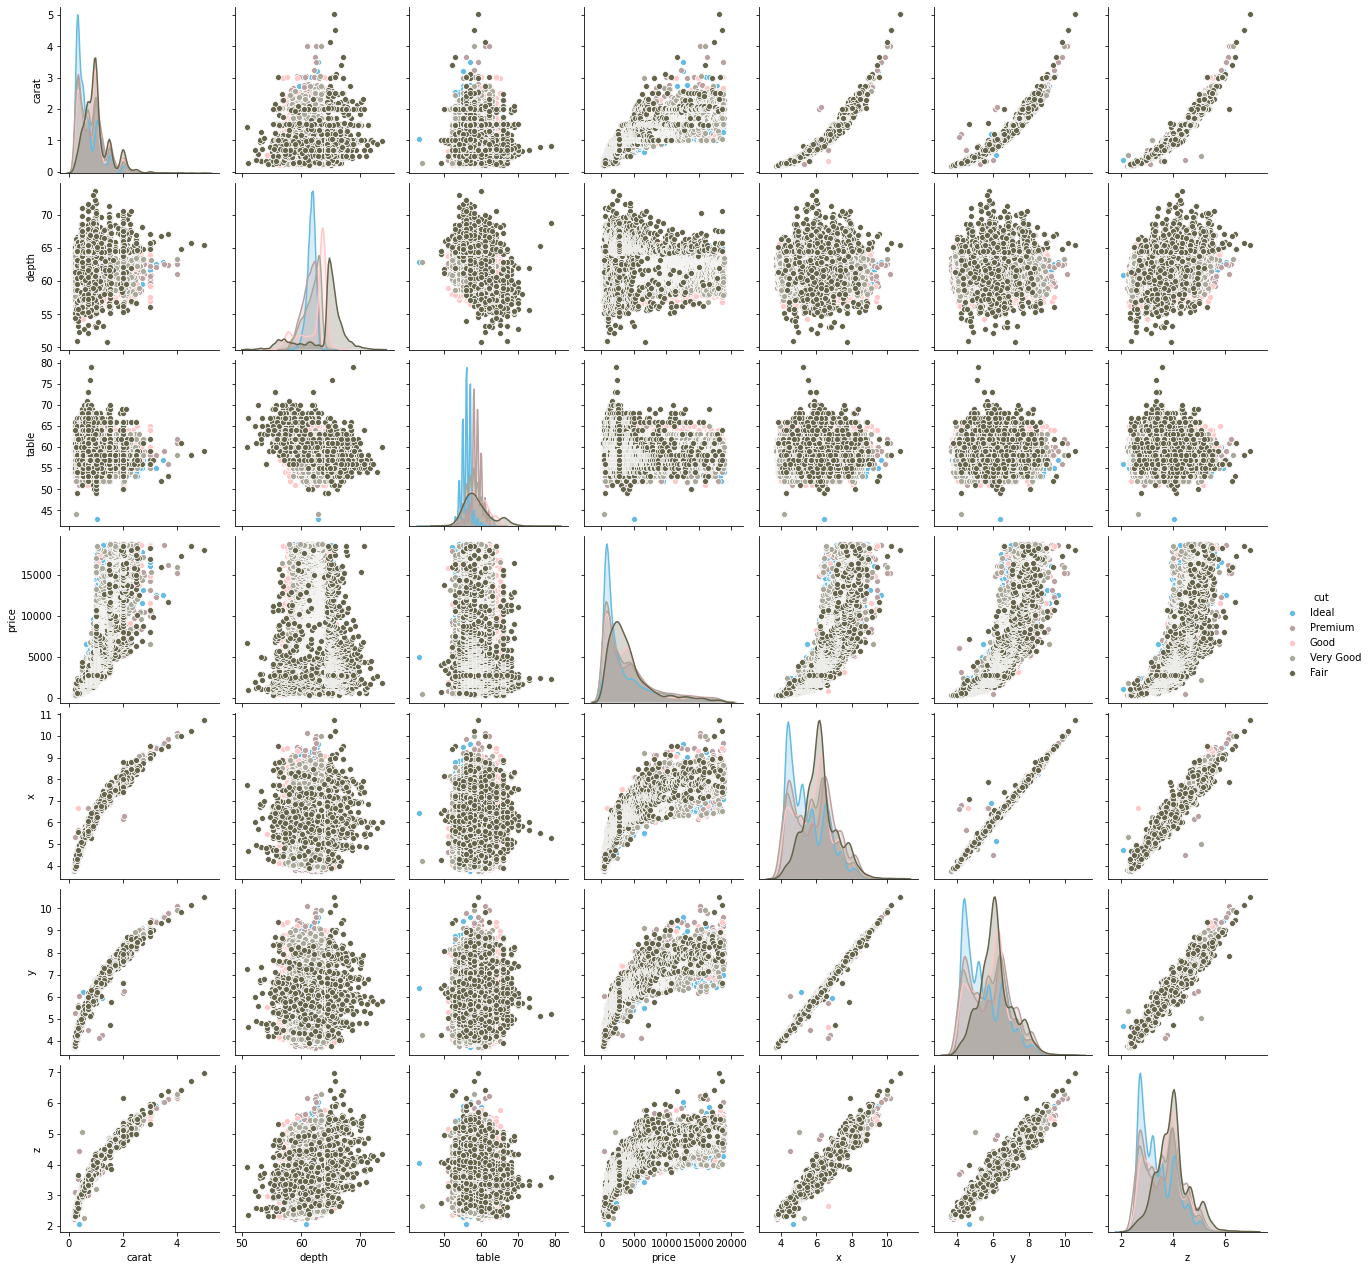

In [19]:
ax=sns.pairplot(df, hue= "cut",palette=shade)

<ipython-input-20-a75f9ba3613a>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax1)


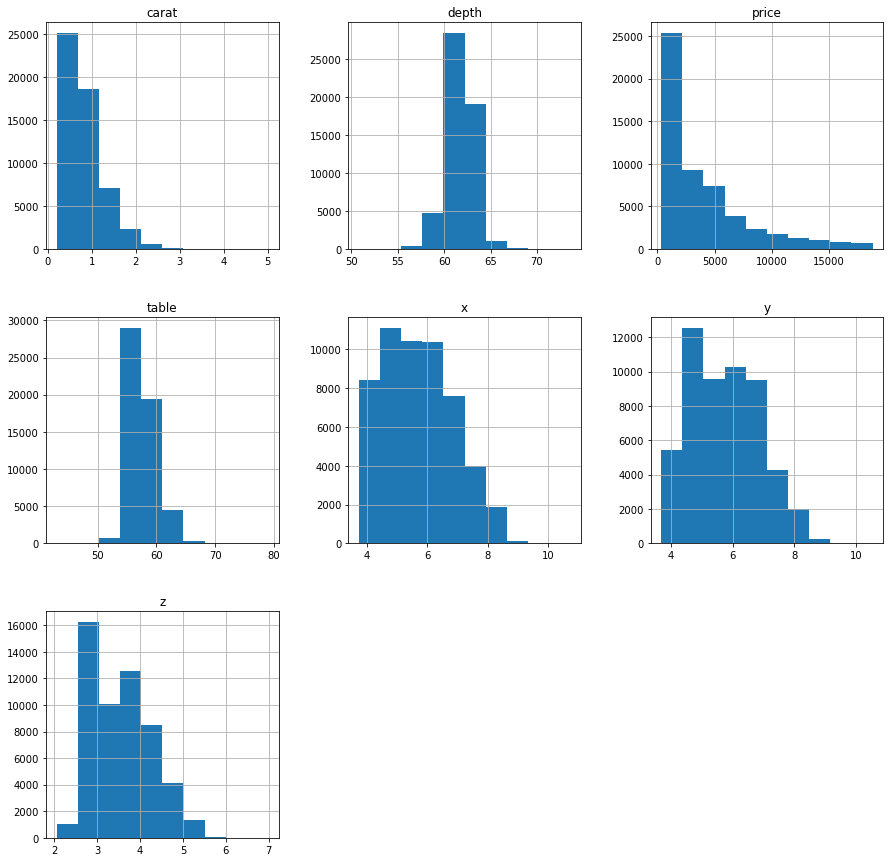

In [20]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,15))
ax1 = fig.gca() # Get the current axes
df.hist(ax = ax1)
plt.show()

### categorical variables - transform
   * 'cut' - Fair, Good, Very Good, Premium, Ideal. (0 - 4)
   * 'color' - from J (worst) to D (best). (0 - 6)
   * 'clarity' - I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best). (0 - 7)<br>
since the categorical variables order has meaning, we will just turn them to numbers.
   
  

In [21]:
# Make copy to avoid changing original data 
label_data = df.copy()

# in each column, change each label to a number
object_cols = ['cut', 'color', 'clarity']
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [22]:
label_data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,2.553379,2.594023,3.835569,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.027442,1.701286,1.724572,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


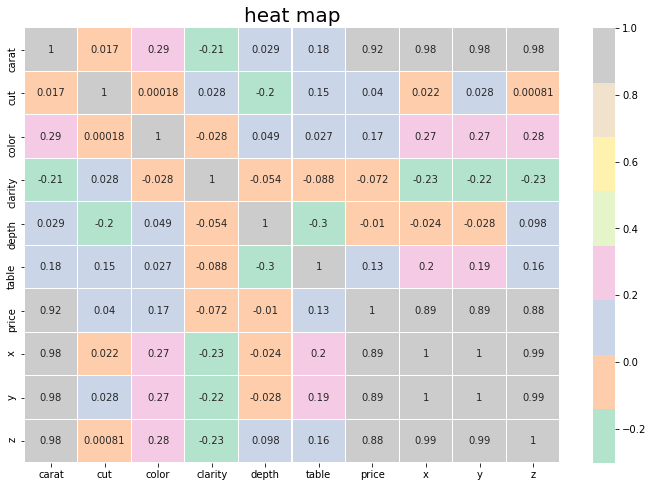

In [23]:
plt.figure(figsize=(12,8))
plt.title('heat map',fontsize=20)
sns.heatmap(label_data.corr(), cmap="Pastel2",linewidths=0.1,annot=True)
plt.show()

### Observations
**high correlation to target:**
   * carat 
   * x,y,z 
   
**low correlation to target:**
   * depth
   * clarity
   

# Model Building

### set up features and target

In [24]:
X= label_data.drop(["price"],axis =1) #df without target
y= label_data["price"] #target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=7)

### Feature Scaling
the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. <br>
scaling by 'MinMaxScaler': $x' = \frac {x - min(x)}{max(x) - min(x)} $ <br> (x' = normalized value)


In [25]:
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_df= pd.DataFrame(scaler.fit_transform(label_data), columns=label_data.columns)

In [26]:
# df after scaling [0-1]
scaled_df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.124247,0.638345,0.432337,0.547938,0.480252,0.401554,0.194874,0.285515,0.299314,0.300699
std,0.098496,0.256860,0.283548,0.246367,0.062286,0.061838,0.215559,0.159684,0.161990,0.140535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.500000,0.166667,0.285714,0.447368,0.361111,0.033681,0.139800,0.151603,0.172764
50%,0.103950,0.500000,0.500000,0.571429,0.482456,0.388889,0.112180,0.281027,0.295918,0.298780
75%,0.174636,0.750000,0.666667,0.714286,0.513158,0.444444,0.270098,0.400856,0.416910,0.402439
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train & Test

In [27]:
print("x_train:", X_train.shape, "x_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

x_train: (37734, 9) x_test: (16173, 9) y_train: (37734,) y_test: (16173,)


**Model Evaluation**
   * $R^2$: regression score function, The distance of the new point from the linear line.
  
   * MAE (Mean Absolute Error): measures the average size of the errors in a set of predictions, without considering their direction. <br>
   $ MAE = \frac{1}{n} \sum\limits_{j=1}^{n} |y_{j}\hat{y}_{j}| $
   
   * MSE (mean squared error) measures the average of the squares of the errors - <br>the average squared difference between the estimated values and the actual value.  <br>
   $ MSE = {\frac{1}{n} \sum\limits_{j=1}^{n} (y_{j}\hat{y}_{j})^2} $
   
   * RNSE (Root mean squared error): square root of MSE. <br>
   $ RMSE = \sqrt{\frac{1}{n} \sum\limits_{j=1}^{n} (y_{j}\hat{y}_{j})^2} $

   

In [38]:
# model Evaluation
def modelEv(model, pred):
    print("R2:", round(metrics.r2_score(y_test, pred), 4))
    print("MAE:", round(metrics.mean_absolute_error(y_test, pred),4))
    print("MSE:", round(metrics.mean_squared_error(y_test, pred),4))
    print("RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, pred)),4))

### #Model_1 - KNN ##

In [39]:
# initialize model
knn = KNeighborsRegressor(n_neighbors = 10)

# fit model
knn.fit(X_train, y_train)

# prediction
pred = knn.predict(X_test)

In [40]:
modelEv(knn, pred)

R2: 0.9494
MAE: 480.2518
MSE: 799180.589
RMSE: 893.969


### #Model_2 - RandomForestRegressor ##
combining multiple decision trees in determining the final output instead of relying on individual decision trees.

In [41]:
# initialize model
rfr = RandomForestRegressor()

# fit model
rfr.fit(X_train, y_train)

# prediction
pred1 = rfr.predict(X_test)

In [42]:
modelEv(rfr, pred1)

R2: 0.9806
MAE: 274.2715
MSE: 307184.8596
RMSE: 554.2426


In [43]:
print("compare test & train accuracy \n")
print("KNN:")
acc1_test = knn.score(X_test, y_test)
print("test data accuracy: ",round(acc1_test*100, 2),"%")
acc1_train = knn.score(X_train, y_train)
print("training data accuracy: ",round(acc1_train*100,2),"% \n")

print("RandomForestRegressor:")
acc_test = rfr.score(X_test, y_test)
print("test data accuracy: ",round(acc_test*100, 2),"%")
acc_train = rfr.score(X_train, y_train)
print("training data accuracy: ",round(acc_train*100,2),"%")

compare test & train accuracy 

KNN:
test data accuracy:  94.94 %
training data accuracy:  95.65 % 

RandomForestRegressor:
test data accuracy:  98.06 %
training data accuracy:  99.73 %


In [44]:
# initialize model
dumReg = DummyRegressor(strategy="mean")

# fit model
dumReg.fit(X_train, y_train)

# prediction
dumPred = dumReg.predict(X_test)

In [45]:
modelEv(dumReg, dumPred)

R2: -0.0
MAE: 3036.3817
MSE: 15802985.7574
RMSE: 3975.2969


## CONCLUSION:

**FINAL RESULT :** <br>
The accuracy was observed the highest is **Random Forest Regressor** with -
   * **R2:** 98%
   * **MAE:** 274.6
   * **MSE:** 306733
   * **RMSE:** 553.8

Therefore, Random Forest Regressor model is the recommended model.
